In [128]:
import numpy as np
import pandas as pd

In [129]:
!pip install librosa
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [130]:
!pip install IPython

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [131]:
#Import Modules

import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa 
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [132]:
# Load the Dataset

paths = []
labels = []

for dirname, _,filenames in os.walk('D:\Projects\Speech Emotion\TESS Toronto emotional speech set data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
print('Dataset Loaded')

Dataset Loaded


In [133]:
paths[:5]

['D:\\Projects\\Speech Emotion\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_back_angry.wav',
 'D:\\Projects\\Speech Emotion\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bar_angry.wav',
 'D:\\Projects\\Speech Emotion\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_base_angry.wav',
 'D:\\Projects\\Speech Emotion\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bath_angry.wav',
 'D:\\Projects\\Speech Emotion\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bean_angry.wav']

In [134]:
labels[:5]

['angry', 'angry', 'angry', 'angry', 'angry']

In [135]:
df = pd.DataFrame()
df['speech']  = paths
df['label'] = labels
df.head()

,speech,label
0,D:\Projects\Speech Emotion\TESS Toronto emotio...,angry
1,D:\Projects\Speech Emotion\TESS Toronto emotio...,angry
2,D:\Projects\Speech Emotion\TESS Toronto emotio...,angry
3,D:\Projects\Speech Emotion\TESS Toronto emotio...,angry
4,D:\Projects\Speech Emotion\TESS Toronto emotio...,angry


In [136]:
df['label'].value_counts()

label
angry      800
disgust    800
fear       800
happy      800
neutral    800
ps         800
sad        800
Name: count, dtype: int64

Text(0.5, 0, 'Labels')

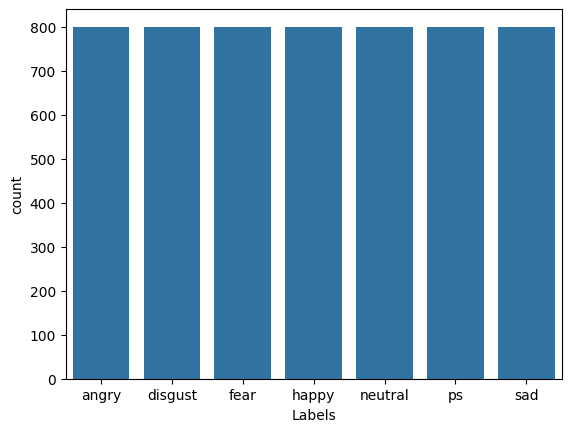

In [137]:
#Exploratry data analysis

sns.countplot(x=df['label'], data = df)
plt.xlabel("Labels")

In [138]:
#display the waveforn of audio file

def waveplot(data, sr, emotion):
    plt.figure(figsize = (10,4))
    plt.title(emotion, size= 20)
    color = 'blue'
    librosa.display.waveshow(data,sr=sr, color=color)
    plt.show()

def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize = (10,4))
    plt.title(emotion, size= 20)
    librosa.display.specshow(xdb ,sr=sr, x_axis = 'time', y_axis = 'hz')
    plt.colorbar()

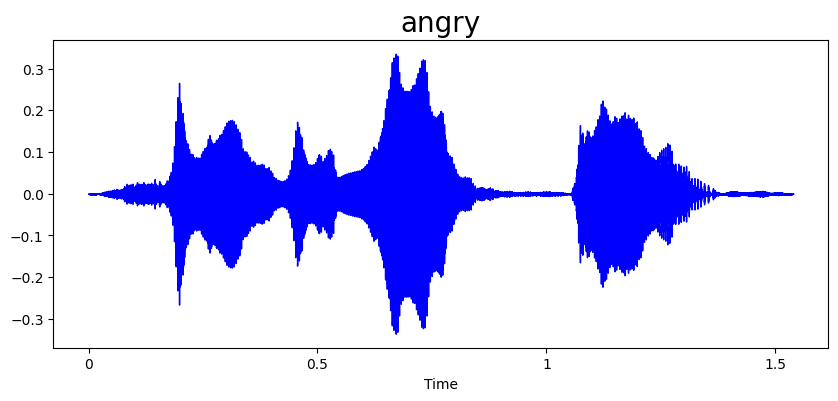

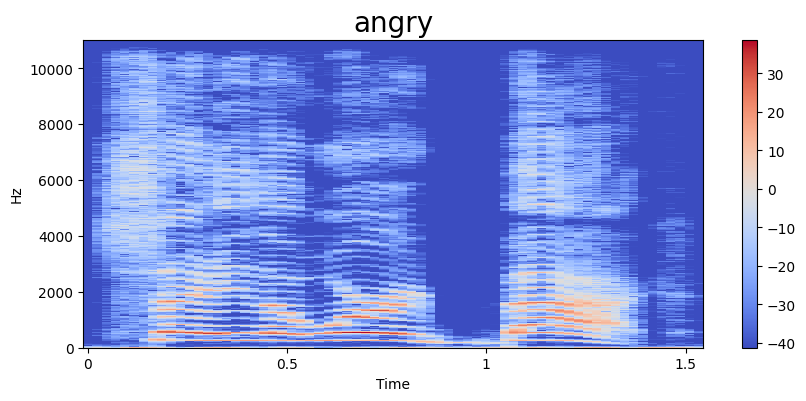

In [139]:
emotion = 'angry'
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

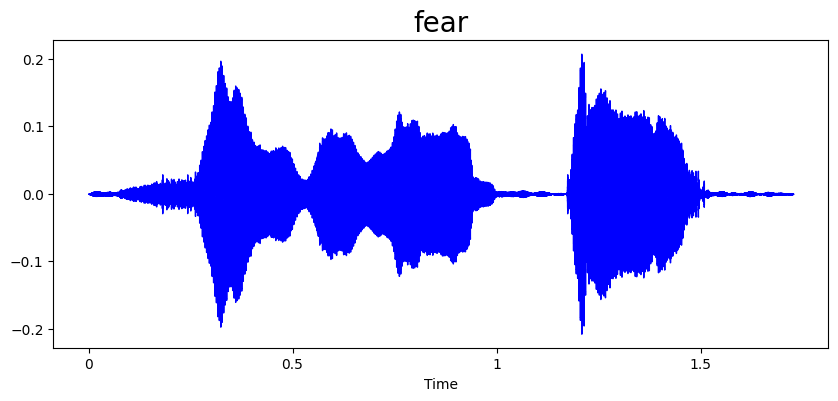

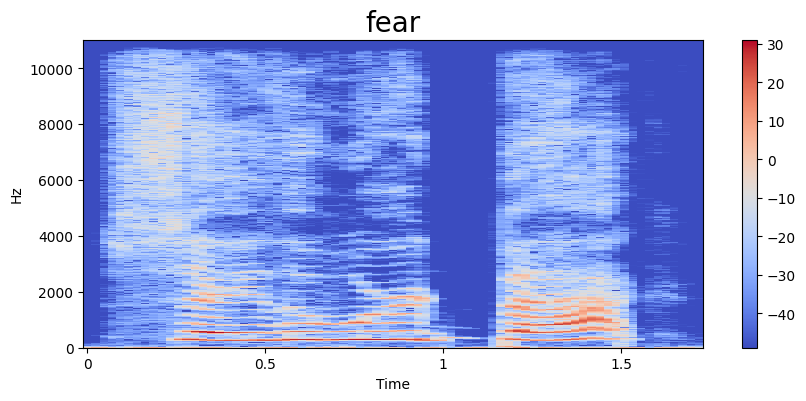

In [140]:
emotion = 'fear'
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

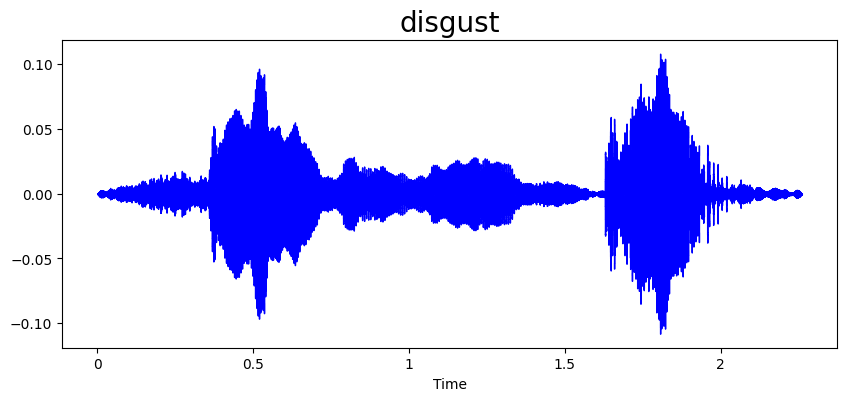

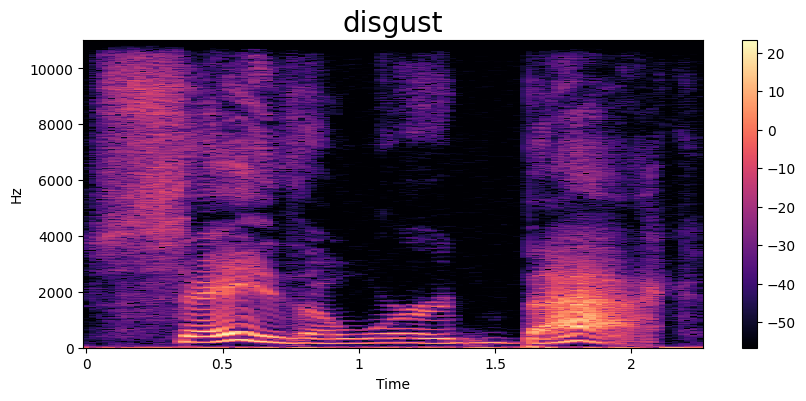

In [141]:
emotion = 'disgust'
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

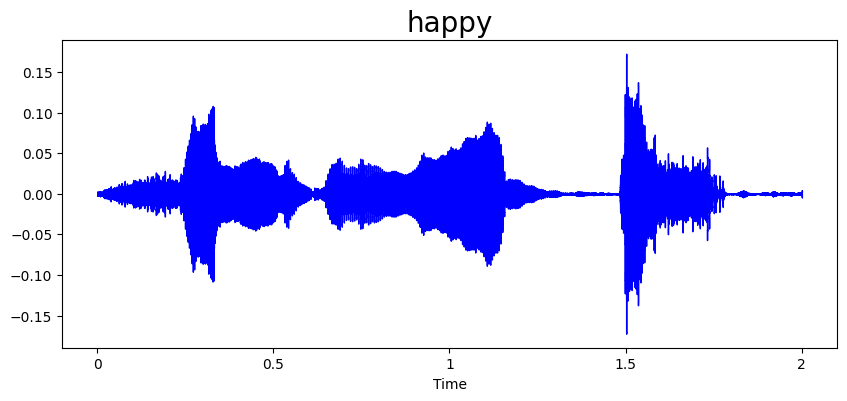

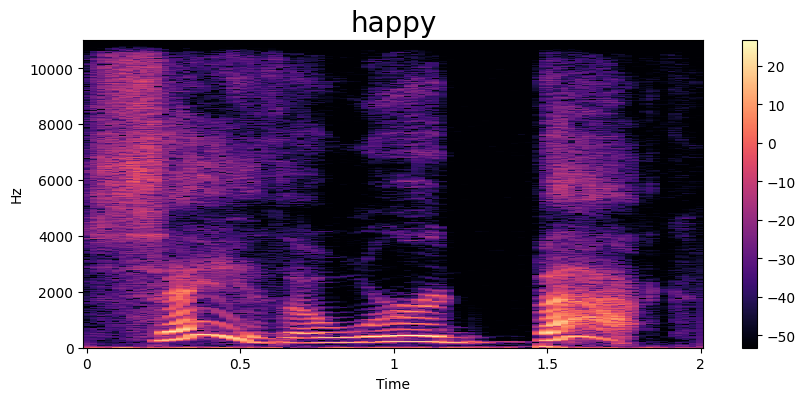

In [142]:
emotion = 'happy'
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

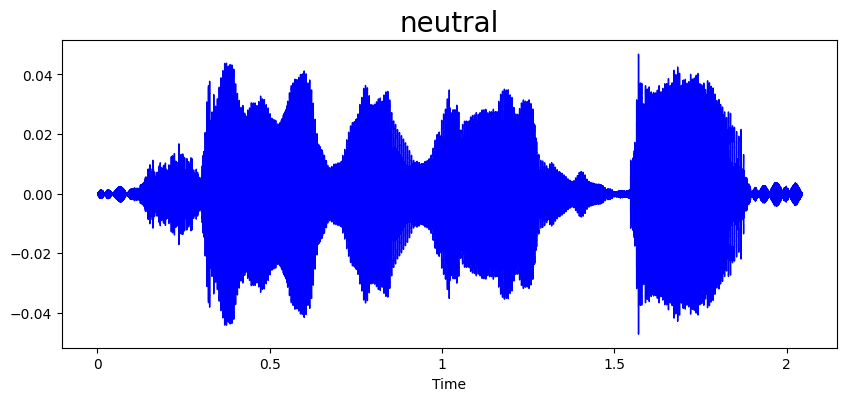

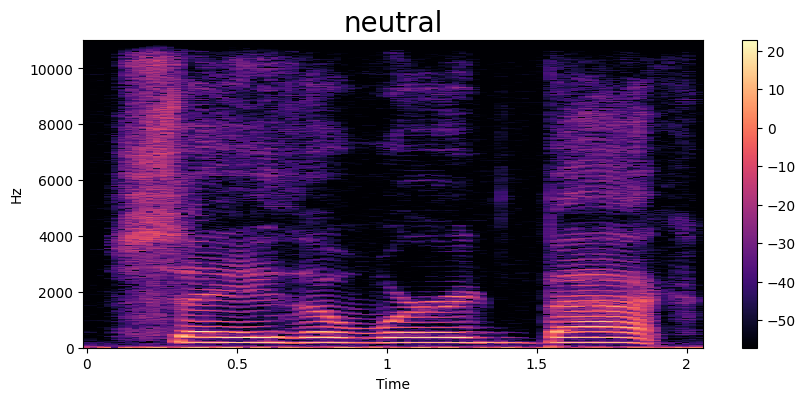

In [143]:
emotion = 'neutral'
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

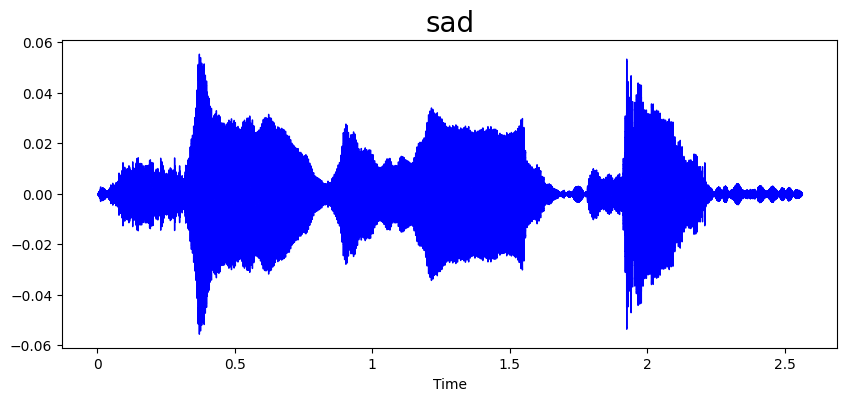

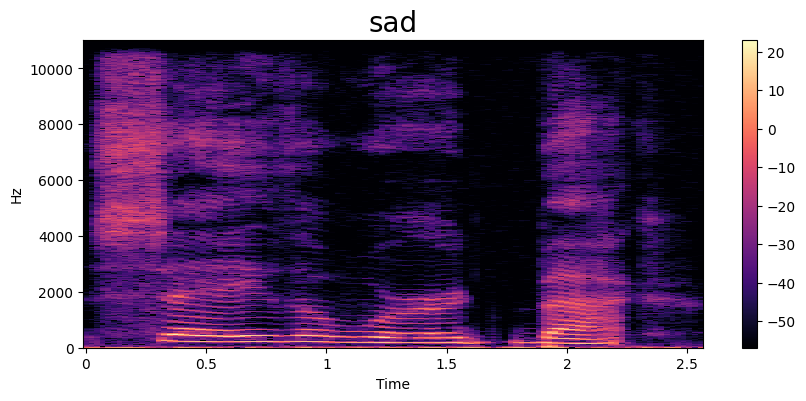

In [144]:
emotion = 'sad'
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

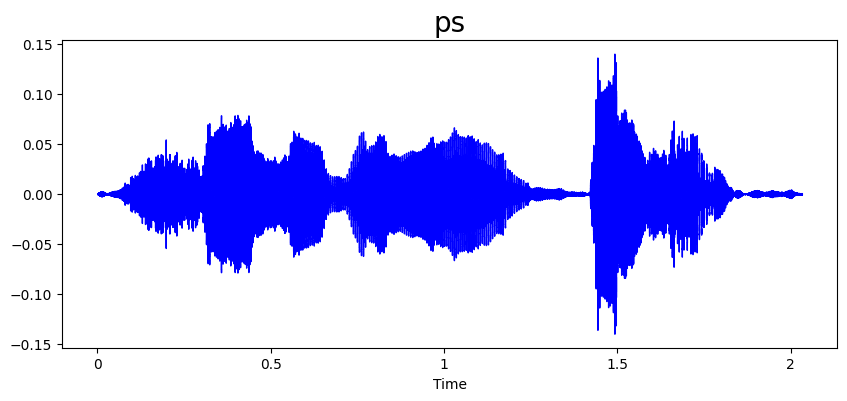

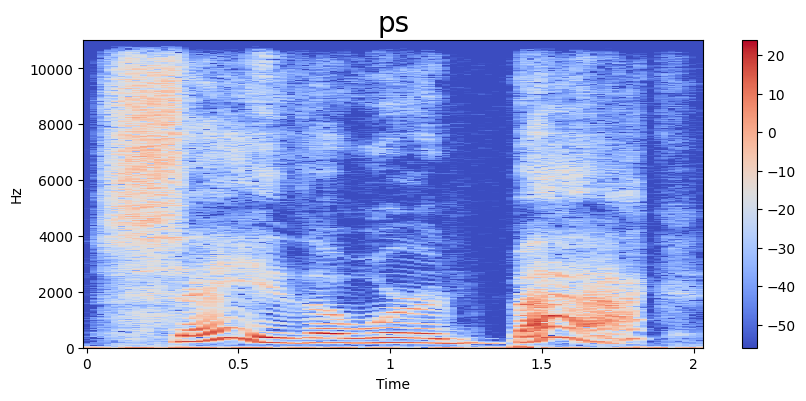

In [145]:
emotion = 'ps'
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [146]:
# Feature Extraction

def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration = 10, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y,sr=sr,n_mfcc = 40).T, axis=0)
    return mfcc

In [147]:
extract_mfcc(df['speech'][0])

array([-3.9698630e+02,  7.7440544e+01, -1.9592793e+01, -2.1666689e+01,
       -2.1127563e+00,  1.0075363e+01, -2.0366709e+01, -6.0924492e+00,
       -7.2122831e+00, -5.5736595e-01, -1.8325537e+00,  2.0210202e-01,
        7.2755092e-01,  1.3177378e+00,  2.8863375e+00,  2.8557916e+00,
       -4.7129192e+00, -4.4365101e+00, -1.6211587e+00, -1.0239840e+01,
       -7.5512633e+00, -1.7968794e+00, -7.0376520e+00,  9.4365845e+00,
        8.3558540e+00,  2.1712360e+01,  1.9216990e+01,  2.0348928e+01,
        1.3413368e+01,  8.3391733e+00,  3.9472228e-01,  5.1113148e+00,
        9.5687399e+00,  5.4548688e+00,  2.5099635e+00, -1.8239068e+00,
        4.8689623e+00,  9.3139238e+00,  2.0891497e+00, -1.9064908e+00],
      dtype=float32)

In [148]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [149]:
X_mfcc

0       [-396.9863, 77.440544, -19.592793, -21.666689,...
1       [-465.73267, 98.77373, 0.65600836, -32.74544, ...
2       [-429.79196, 46.12401, 1.5550478, -0.21709459,...
3       [-403.46118, 76.32369, -12.531775, -22.288858,...
4       [-434.05756, 77.4455, 10.8654995, 16.092943, 8...
                              ...                        
5595    [-406.48053, 80.379875, 32.462395, 46.579094, ...
5596    [-426.90918, 102.54756, 24.800041, 43.048096, ...
5597    [-378.50494, 80.91062, 35.300533, 39.74792, -4...
5598    [-434.8618, 89.906364, 28.373262, 39.577072, -...
5599    [-421.8341, 70.69788, 32.47639, 45.642555, 4.7...
Name: speech, Length: 5600, dtype: object

In [150]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(5600, 40)

In [151]:
#Input Split

X = np.expand_dims(X, -1)
X.shape

(5600, 40, 1)

In [152]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [153]:
y = y.toarray()

In [154]:
y.shape

(5600, 7)

In [155]:
#create LSTM Model

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
model = Sequential([
    LSTM(123, return_sequences=False, input_shape=(40,1)),
    Dense(64, activation = 'relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 123)               61500     
                                                                 
 dense_3 (Dense)             (None, 64)                7936      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 7)                 231       
                                                                 
Total params: 71747 (280.26 KB)
Trainable params: 7174

In [156]:
# Train the model
history = model.fit(X,y, validation_split = 0.2, epochs=100, batch_size=512, shuffle=True)

Epoch 1/100
9/9 [==============================] - 4s 210ms/step - loss: 1.8736 - accuracy: 0.2973 - val_loss: 1.8458 - val_accuracy: 0.2268
Epoch 2/100
9/9 [==============================] - 1s 142ms/step - loss: 1.6191 - accuracy: 0.4165 - val_loss: 1.6301 - val_accuracy: 0.3455
Epoch 3/100
9/9 [==============================] - 1s 147ms/step - loss: 1.3239 - accuracy: 0.4897 - val_loss: 1.3009 - val_accuracy: 0.4366
Epoch 4/100
9/9 [==============================] - 1s 138ms/step - loss: 1.0779 - accuracy: 0.5806 - val_loss: 0.8748 - val_accuracy: 0.7554
Epoch 5/100
9/9 [==============================] - 1s 145ms/step - loss: 0.8657 - accuracy: 0.6661 - val_loss: 0.6519 - val_accuracy: 0.8652
Epoch 6/100
9/9 [==============================] - 1s 157ms/step - loss: 0.6980 - accuracy: 0.7350 - val_loss: 0.3957 - val_accuracy: 0.9491
Epoch 7/100
9/9 [==============================] - 1s 156ms/step - loss: 0.5229 - accuracy: 0.8143 - val_loss: 0.2597 - val_accuracy: 0.9580
Epoch 8/100
9

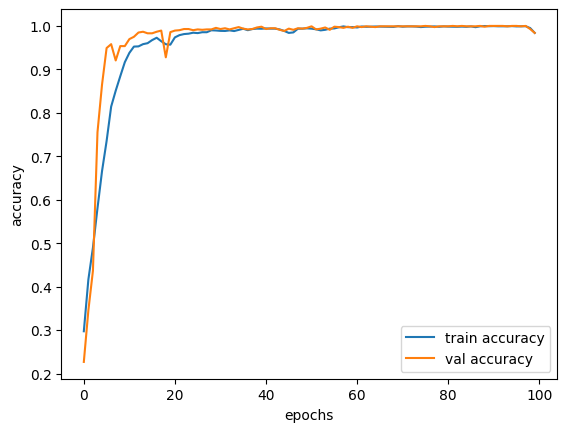

In [157]:
#Plot the Results
epochs = list(range(100))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

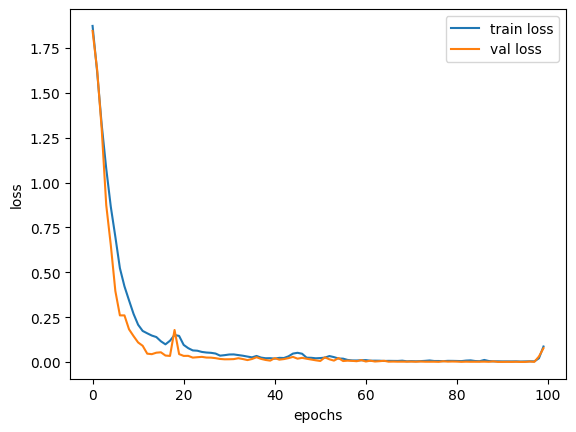

In [158]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [159]:
reverse_labels = ['angry','disgust','fear','happy','nutral','plesent surprise','sad']

In [160]:

input = "D:/Projects/Speech Emotion/test.wav"
X = np.expand_dims(extract_mfcc(input).T,axis=0)
X = X.reshape(1,-1)
Y = model.predict(X)
predicted_indices = np.argmax(Y, axis=1)

predicted_labels = [reverse_labels[idx] for idx in predicted_indices]
print("Predicted labels:", predicted_labels)

1/1 [==============================] - 1s 548ms/step
Predicted labels: ['angry']


In [161]:
def print_classifier(predicted_labels):
    if predicted_labels in [['angry'], ['happy'], ['neutral'], ['pleasant surprise']]:
        print("Confident")
    else:
        print("Unconfident")

In [162]:
print_classifier(predicted_labels)

Confident
